# Trabajo Práctico 2: Reseñas de Películas - Naive Bayes

## Grupo 11 - "Los Outliers"

- Castillo, Carlos
- Destefanis, Juan Pablo
- Gómez, Celeste

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

# Constants
SEED = 13

En esta notebook, detallamos el entrenamiento del modelo Naive Bayes que resultó obtener el mejor resultado en Kaggle. La idea era usarlo solamente de benchmark para el resto de los modelos.

## Carga de datos

Para el preprocesamiento de los datasets, se eliminó la repeticion de entidades y los tokens sin POS, se le agrego un Regex de limpieza manual, IOB encoding y manejo de las negaciones por enunciado (hasta siguiente signo de puntuacion).

Para ahorrar tiempo, importamos los CSVs ya preprocesados.

In [5]:
df_train = pd.read_csv("train-naive-bayes.csv", encoding='utf-8', on_bad_lines='warn')
df_test = pd.read_csv("test-naive-bayes.csv", index_col=0)

X_train, X_test, y_train, y_test = train_test_split(df_train.review_es, df_train.sentimiento, test_size=0.2, random_state=SEED, stratify=df_train.sentimiento)

## Vectorización

Creamos el TFIDF vectorizer para convertir los datasets en matrices a usar en el modelo.

In [8]:
vectorizer = TfidfVectorizer(
    ngram_range=(1,2),
    min_df=10
)

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
X_train_vectorized

<40000x117455 sparse matrix of type '<class 'numpy.float64'>'
	with 10522043 stored elements in Compressed Sparse Row format>

## Entrenamiento

              precision    recall  f1-score   support

    negativo       0.88      0.87      0.88      5000
    positivo       0.87      0.88      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

F1-Score: 0.8753995015980065
Accuracy: 0.8754
Precision: 0.8754060064961039
Recall: 0.8754


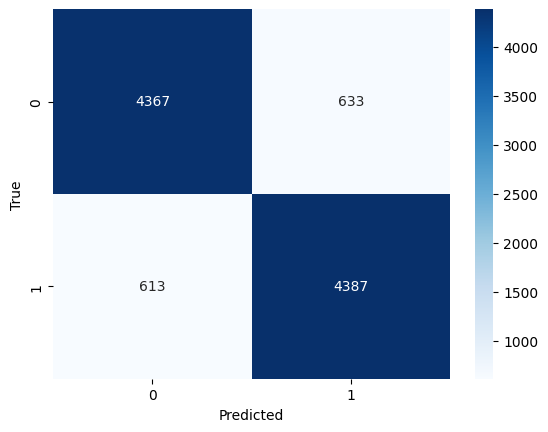

In [9]:
clf = MultinomialNB()
clf.fit(X_train_vectorized, y_train)
y_pred_test = clf.predict(X_test_vectorized)

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_test), cmap='Blues', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

print(metrics.classification_report(y_test, y_pred_test, zero_division=0))
print('F1-Score: {}'.format(metrics.f1_score(y_test, y_pred_test, average='macro')))
print('Accuracy: {}'.format(metrics.accuracy_score(y_test, y_pred_test)))
print('Precision: {}'.format(metrics.precision_score(y_test, y_pred_test, average='macro', zero_division=0)))
print('Recall: {}'.format(metrics.recall_score(y_test, y_pred_test, average='macro', zero_division=0)))